### Project Name: US Accidents Dataset
### Team member: Gauri Kulkarni(823697401) , Shweta Nazarkar()

In [1]:
# IMPORT PACKAGES AND MODULES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read US Accidents dataset

In [2]:
us_accidents_path = "D:\\Big Data\\Project\\us-accidents\\"
us_accidents_filename = "US_Accidents_Dec19.csv"


In [2]:
us_accidents_path = r'/Users/gaurikulkarni/Downloads/'
us_accidents_filename = 'US_Accidents_Dec19.csv'



,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
us_accident_data = pd.read_csv(us_accidents_path+us_accidents_filename)
us_accident_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
list(us_accident_data)

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

### Accident count per state 

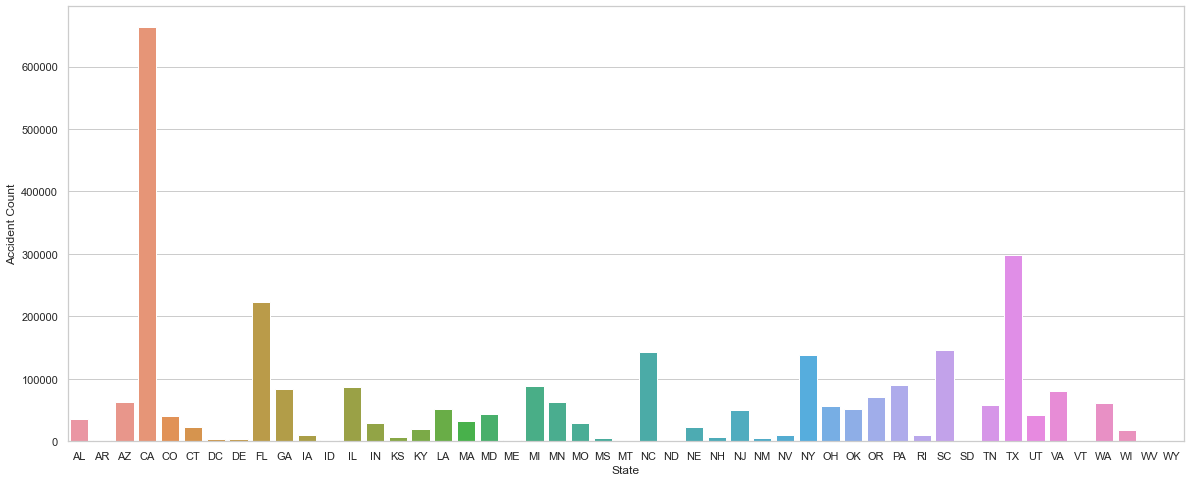

In [5]:
def stateByCount(df_data):
    df_result = df_data.groupby(['State'])['ID'].count()
    return df_result

state_by_data = stateByCount(us_accident_data)

state_by_accidnets = pd.DataFrame(state_by_data).reset_index()
state_by_accidnets.columns = ['State','Accident Count']

sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
ax = sns.barplot(x="State", y="Accident Count", data=state_by_accidnets)

#### Analysis: This graph syas that California is with highest count for accidents in the US 

-------------------------------------------------------------------------------------------------------------------

### Severity of the accidetns 

In [13]:
# us_accident_data['Severity'].value_counts().plot.pie(subplots=True, figsize=(15, 5))
severity_count =  us_accident_data['Severity'].value_counts()
severity_count = pd.DataFrame(severity_count).reset_index()
severity_count.columns = ['Severity Range','Count']
severity_count

,Severity Range,Count
0,2,1993410
1,3,887620
2,4,92337
3,1,968


### Infrastructure impact 

Text(0.5, 1.0, 'Infrastructure object contribution to accident')

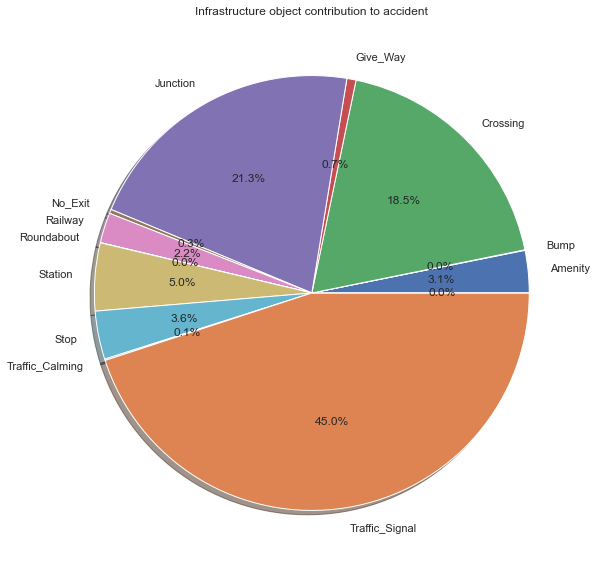

In [14]:
#we will plot pie chart only for bool columns
bool_cols = [col for col in us_accident_data.columns if us_accident_data[col].dtype == np.dtype('bool')]
bools = us_accident_data[bool_cols].sum(axis=0)

bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Infrastructure object contribution to accident')


### State wise severity

In [24]:
state_wise_severity = us_accident_data.groupby(['State','Severity'])['ID'].count()
state_wise_severity = pd.DataFrame(state_wise_severity).reset_index()
state_wise_severity.columns = ['State','Severity','Accident Count']
state_wise_severity

,State,Severity,Accident Count
0,AL,1,18
1,AL,2,23906
2,AL,3,11931
3,AL,4,514
4,AR,2,860
5,AR,3,439
6,AR,4,450
7,AZ,1,21
8,AZ,2,47248
9,AZ,3,12003


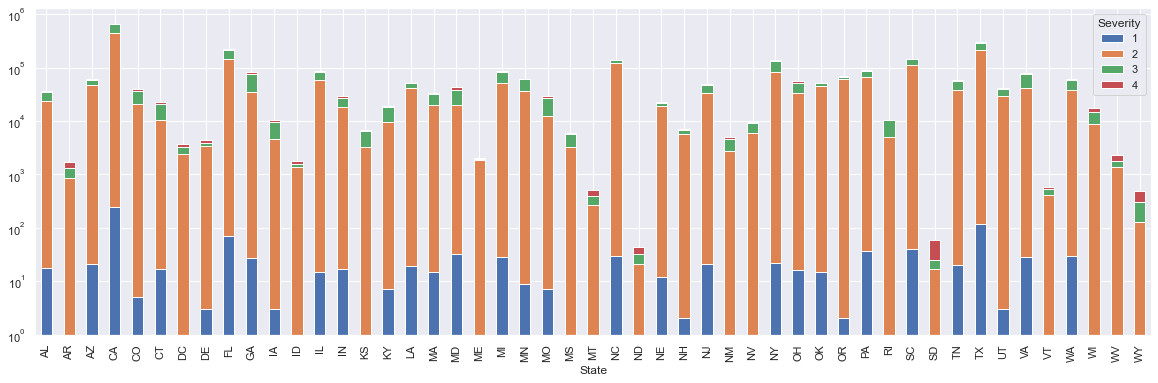

In [29]:
pivot_df = state_wise_severity.pivot(index='State', columns='Severity', values='Accident Count')
pivot_df.plot(kind='bar',figsize=(20,6),stacked=True,logy=True)

#### Analysis:As per the graph we can say that most of the records are of severity level 2 and 3. Since state CA has maximum number of accidents, we will analyse CA data further for weather conditions, infrastructure conditions

-------------------------------------------------------------------------------------------------------------------
### Finding key factor for increasing an accidents

In [8]:
us_accdient_factors = us_accident_data[['ID','Severity','State','Temperature(F)','Visibility(mi)','Weather_Condition']]
us_accdient_factors

,ID,Severity,State,Temperature(F),Visibility(mi),Weather_Condition
0,A-1,3,OH,36.9,10.0,Light Rain
1,A-2,2,OH,37.9,10.0,Light Rain
2,A-3,2,OH,36.0,10.0,Overcast
3,A-4,3,OH,35.1,9.0,Mostly Cloudy
4,A-5,2,OH,36.0,6.0,Mostly Cloudy
5,A-6,3,OH,37.9,7.0,Light Rain
6,A-7,2,OH,34.0,7.0,Overcast
7,A-8,3,OH,34.0,7.0,Overcast
8,A-9,2,OH,33.3,5.0,Mostly Cloudy
9,A-10,3,OH,37.4,3.0,Light Rain


### a. Weather Condition with severity

C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shwet\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

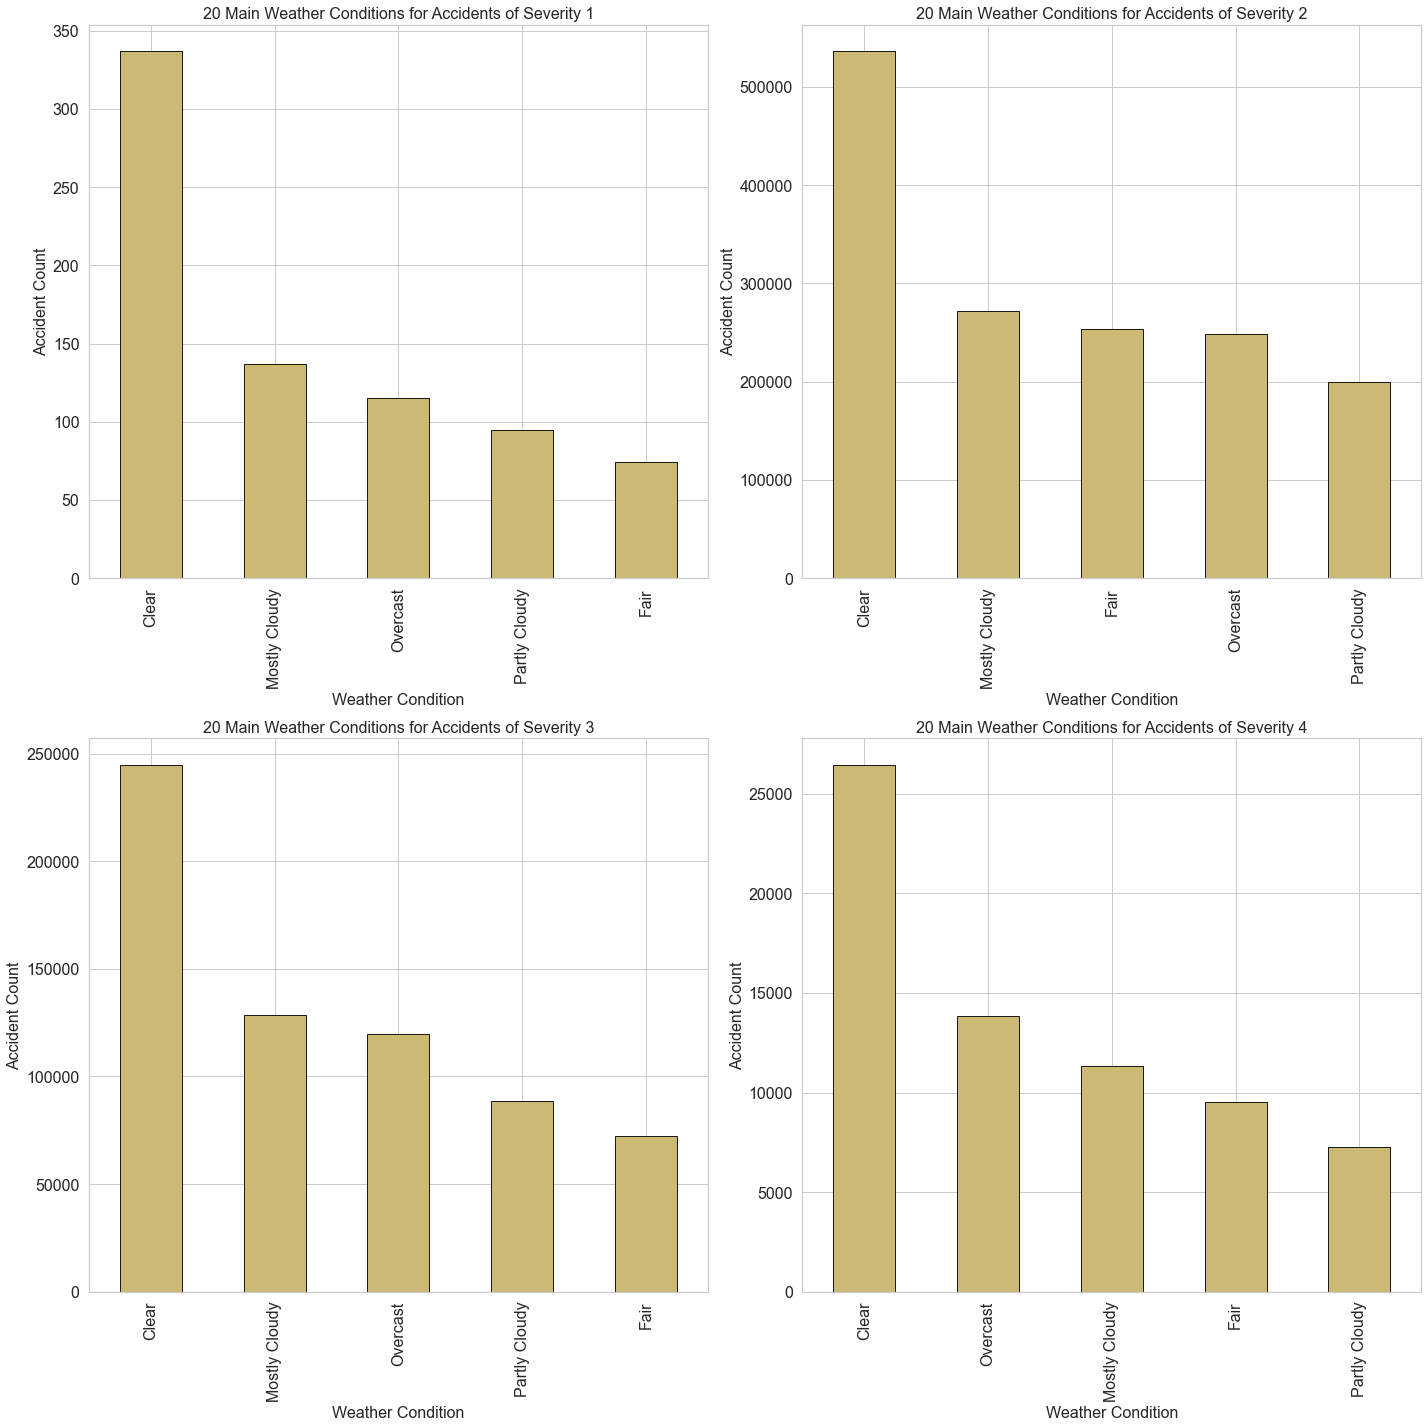

In [9]:
plt.subplots(2,2,figsize=(20,20))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    us_accdient_factors.loc[us_accdient_factors["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### Analysis:

---------------------------------------------------------------------------------------------------------------

### b. Visbility Impact 

/Users/gaurikulkarni/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gaurikulkarni/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


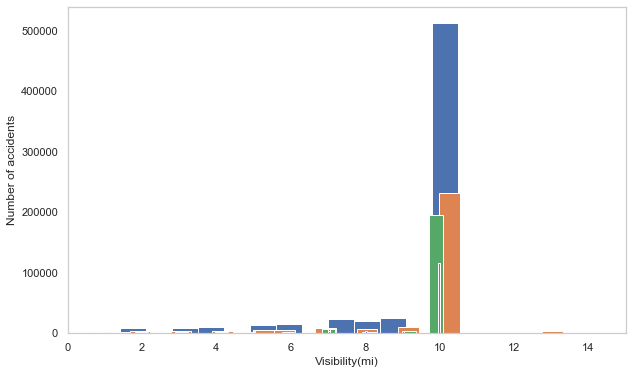

In [70]:
bins = 200
plt.figure(figsize=(10,6))
state_data = state_by_accidnets.nlargest(5, 'Accident Count') # considering 5 state with heighest count

for state in state_data['State']:
    stfilter = (us_accdient_factors['State'] == state)
    plt.hist(us_accdient_factors.loc[stfilter,'Visibility(mi)'],bins,density=False)
plt.xlabel('Visibility(mi)')
plt.ylabel('Number of accidents')
plt.xlim(0,15)
plt.grid()
plt.show()

Finding Date column from start time

In [9]:
us_accident_data['Date'] = us_accident_data['Start_Time'].str.split(n=1).str[0]
us_accident_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2016-02-08
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,2016-02-08
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,2016-02-08
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,2016-02-08
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2016-02-08


In [34]:
#daily_accident_data = us_accident_data.groupby(['State','Date'])['ID'].count()
daily_accident_data = us_accident_data.groupby(['Date'])['ID'].count()
daily_accident_data


Date
2015-03-09       1
2016-01-14       7
2016-02-08      60
2016-02-09      59
2016-02-10      49
2016-02-11      93
2016-02-12      18
2016-02-13      14
2016-02-14      13
2016-02-15      62
2016-02-16      84
2016-02-17      51
2016-02-18      73
2016-02-19      72
2016-02-20       4
2016-02-21       7
2016-02-22      55
2016-02-23      58
2016-02-24      86
2016-02-25      51
2016-02-26      27
2016-02-27       6
2016-02-28       7
2016-02-29      36
2016-03-01      55
2016-03-02      40
2016-03-03      64
2016-03-04      58
2016-03-05       7
2016-03-06       4
              ... 
2019-12-03    3937
2019-12-04    4882
2019-12-05    3843
2019-12-06    4165
2019-12-07    1923
2019-12-08    2092
2019-12-09    4419
2019-12-10    4298
2019-12-11    4450
2019-12-12    4565
2019-12-13    4568
2019-12-14    2246
2019-12-15    1770
2019-12-16    3793
2019-12-17    4102
2019-12-18    4133
2019-12-19    4361
2019-12-20    4147
2019-12-21    1792
2019-12-22    2087
2019-12-23    4302
2019-12

### Accident cases each year

,Year,Accident Count
0,2015,1
1,2016,410600
2,2017,717483
3,2018,892615
4,2019,953630
5,2020,6


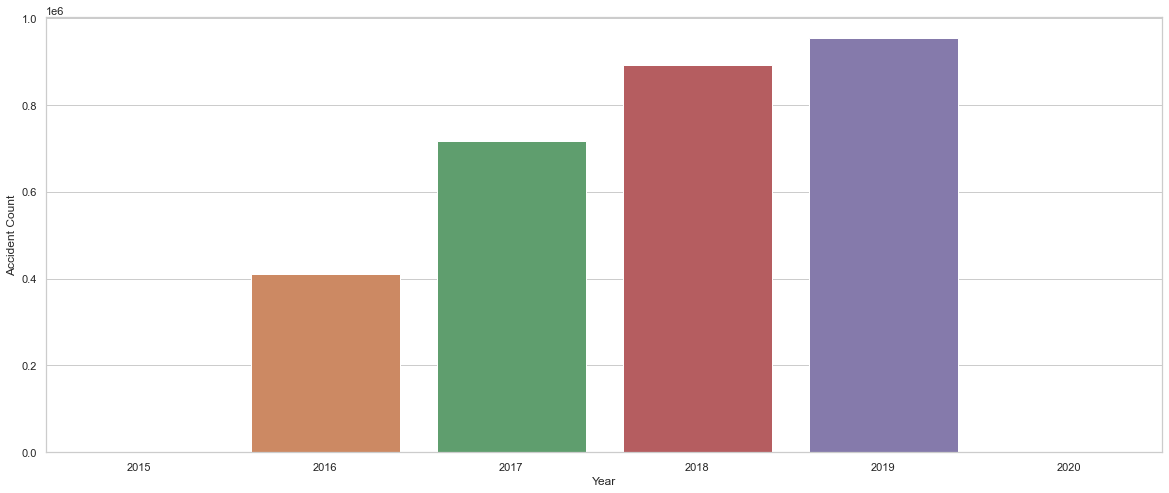

In [37]:
us_accident_data_yearly = pd.DatetimeIndex(us_accident_data['Date']).year
us_accident_data_yearly = pd.DataFrame(us_accident_data_yearly)
us_accident_data_yearly = us_accident_data_yearly.groupby('Date').size()
us_accident_data_yearly = pd.DataFrame(us_accident_data_yearly).reset_index()
us_accident_data_yearly.columns = ['Year','Accident Count']

sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Year", y="Accident Count", data=us_accident_data_yearly)
us_accident_data_yearly

TODO above analysis

In [69]:
largest_count_states = state_by_accidnets.nlargest(5,'Accident Count')
largest_count_states

,State,Accident Count
3,CA,663204
41,TX,298062
8,FL,223746
38,SC,146689
25,NC,142460


In [70]:
state_list = list(largest_count_states.State)
state_list


['CA', 'TX', 'FL', 'SC', 'NC']

In [84]:
#new_df = us_accident_data[us_accident_data['State']=='CA']
us_accident_data['Month'] = pd.DatetimeIndex(us_accident_data['Date']).month
us_accident_data['Year'] = pd.DatetimeIndex(us_accident_data['Date']).year
month_year_df = pd.DataFrame(us_accident_data)
#print(month_df.dtypes)
month_year_df




,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Month,Year
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,Night,Night,Night,Night,2016-02-08,2,2016
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,Night,Night,Night,Day,2016-02-08,2,2016
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,True,False,Night,Night,Day,Day,2016-02-08,2,2016
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,Night,Day,Day,Day,2016-02-08,2,2016
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,True,False,Day,Day,Day,Day,2016-02-08,2,2016
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016


In [79]:
    month_year_df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Month,Year
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,Night,Night,Night,Night,2016-02-08,2,2016
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,Night,Night,Night,Day,2016-02-08,2,2016
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,True,False,Night,Night,Day,Day,2016-02-08,2,2016
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,Night,Day,Day,Day,2016-02-08,2,2016
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,True,False,Day,Day,Day,Day,2016-02-08,2,2016
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,Day,Day,Day,Day,2016-02-08,2,2016


In [92]:
for state in state_list:
    new_df = month_year_df[month_year_df['State'] == state]
    yearmonth_data = new_df.groupby(['Year','Month','Visibility(mi)'])['ID'].count()
    print(yearmonth_data)
#     yearmonth_data = pd.DataFrame(yearmonth_data).reset_index()
#     yearmonth_data.columns = ['Year','Month','Accident Count']
#     plt_df = yearmonth_data.pivot(index='Month',columns='Year',values='Accident Count')
#     plt_df.plot(kind='bar',figsize=(20,6),title='Per year per month accident count for '+state)

Year  Month  Visibility(mi)
2016  3      0.20                  2
             1.00                  1
             1.20                  1
             1.50                  1
             2.50                  4
             3.20                  1
             4.00                  7
             5.00                 10
             6.00                 13
             7.00                 58
             8.00                 45
             9.00                 72
             10.00              3971
             15.00                 1
             20.00                 9
             30.00                19
      4      0.20                  4
             0.50                  5
             0.80                  8
             1.00                  6
             1.20                  2
             1.50                  5
             1.80                  6
             2.00                 28
             2.50                 33
             3.00                 69
          

We can see that accident cases are more in last four months of the year i.e. from Sept to Dec